# Simulating Stochastic Differential Equations
[03-10-2024] Abhijeet Rao at the University of Edinburgh


Solving Stochastic Differential Equations of the Form:

$$
dX_t = \mu(X_t, t)dt + \sigma(t, X_t)dW_t
$$

We have two different methods. Euler-Maruyama and Milstein, which are given by the equations below:


$$
\begin{align*}
\textrm{Euler-Maruyama:}~~~~~~~~~~~~X_{n+1} &= X_n + \mu(X_n, t_n) \Delta t + \sigma(t_n, X_n) \Delta W_n\\\\
\textrm{Milstein:}~~~~~~~~~~~~X_{n+1} &= X_n + \mu(X_n, t_n) \Delta t + \sigma(t_n, X_n) \Delta W_n + \frac{1}{2} \sigma(t_n, X_n) \sigma'(t_n, X_n) (\Delta W_n^2 - \Delta t)
\end{align*}
$$

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

The simulator below simulates the Langevin equation:

$$
 dx = -\frac{x-\mu}{\tau}dt + \sigma\sqrt{\frac{2}{\tau}}dW
$$

In [32]:
# set hyperparameters

class model():
    def __init__(self, mean=10.0, std=1.0, x_init=5.0, dt=0.001, time_horizon=1.0, tau=0.05):
        #distribution parameters
        self.mean = mean
        self.std = std

        #time parameters
        self.x_init = x_init
        self.dt = dt
        self.tau = tau
        self.t_end = time_horizon
        self.num_steps = int(self.t_end/self.dt)
        self.time_vec = np.linspace(0, self.t_end, self.num_steps)


    def euler_langevin(self):
        x = np.zeros(self.num_steps)
        x[0] = self.x_init

        # Compute outside to avoid repeated computation as stated in ref[2]
        dt_root = np.sqrt(self.dt)
        sigma_bis = self.std * np.sqrt(2. / self.tau)
        sigma_func = dt_root * sigma_bis

        for i in range(self.num_steps - 1):
            Z = np.random.randn() # noise from standard normal distribution N(0,1)
            mu_func = -(x[i] - self.mean) / self.tau

            x[i+1] = x[i] \
                     + mu_func * self.dt \
                     + sigma_func * Z
        
        return x


    def milstein_langevin(self):
        x = np.zeros(self.num_steps)
        x[0] = self.x_init

        dt_root = np.sqrt(self.dt)
        sigma_bis = self.std * np.sqrt(2. / self.tau)

        for i in range(self.num_steps - 1):
            Z = np.random.normal(loc=0.0, scale=np.sqrt(self.dt))

            mu_func = -(x[i] - self.mean) / self.tau
            sigma_func = dt_root * sigma_bis * x[i]
            milstein_term = (self.std**2 / 2) * x[i] * (Z**2 - self.dt)

            x[i+1] = x[i] \
                     + mu_func * self.dt \
                     + sigma_func * Z  \
                     + milstein_term

        return x

    def exact_solution(self):

In [33]:
langevin = model()
euler_langevin_sim = langevin.euler_langevin()
milstein_langevin_sim = langevin.milstein_langevin()

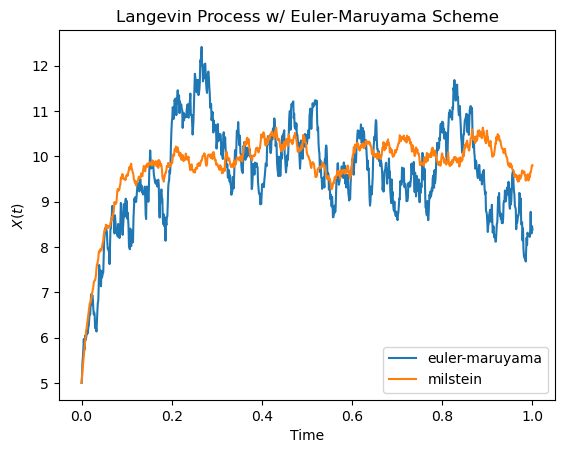

In [34]:
plt.plot(langevin.time_vec, euler_langevin_sim, label = 'euler-maruyama')
plt.plot(langevin.time_vec, milstein_langevin_sim, label = 'milstein')
plt.xlabel('Time')
plt.ylabel('$X(t)$')
plt.title('Langevin Processes w/ Euler-Maruyama Scheme')
plt.legend()
plt.show()

### References
[1] [Wikipedia - Euler-Maruyama](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method)

[2] [Wikipedia - Milstein](https://en.wikipedia.org/wiki/Milstein_method)

[3] [Columbia - Simulating SDEs](https://www.columbia.edu/~mh2078/MonteCarlo/MCS_SDEs.pdf)

[4] [iPython - Simulating SDEs](https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/)

[5] [Hautahi Kingi - Simulating SDEs](https://hautahi.com/sde_simulation)

### CORRECTION
1. Revisit milstein process again, there are some incorrect terms.
2. revisit the scaling for noise term.
3. Find exact solution for the langevin equation.
    formal solution ornstein-uhlebleck processes (same as langevin kindof)

Brownian birdge

Find temperature data for the earth (not necessary but it would be nice)
- could do statistical analysis on the data
- find out some kind of period
- having this data would open up several avenues

Monte-Carlo
- simulate a lot and take the average at the end to get the expectation.


Different ways to visualise results 
- through monte-carlo for example
- simulate a bunch of paths and show the reader
- simulate a bunch of paths and do analysis on their paths.

Calculate probabilities
- likeliness to being in warm age vs cold age

Take a look at implementing climate resonance paper's SDE.
